In [1]:
from __future__ import print_function, division

# Basic python packages
import os
import itertools

# External plotting and analysis tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Internal plotting and analysis
from exnihilotools.matplotlib import *
article_style()

In [2]:
def get_files(basepath):
    for (root, dirs, files) in os.walk(basepath):
        for filename in files:
            if not filename.endswith(".out"):
                continue
            reldirname = root[len(basepath):].lstrip('/')
            yield (reldirname, filename)

In [3]:
# Grab timings from the output files
# Total execution time
# neutronics::Manager_Deterministic.solve
tests = []
solve_time = [] # solve frac * execution time
for reldir, filename in get_files(os.getcwd()):
    # open the file for reading
    with open(os.path.join(reldir, filename), 'r') as f:
        exec_time = 0.0
        solve_frac = 0.0
        for line in f.readlines():
            if "Total execution time" in line:
                exec_time = float(line.split()[4])
            if "neutronics::Manager_Deterministic.solve" in line:
                solve_frac = float(line.split()[1])
        solve_time.append(solve_frac * exec_time)
    tests.append(reldir)

In [4]:
print(tests)

['arnoldi-full/1', 'arnoldi-full/2', 'arnoldi-full/4', 'arnoldi-full/8', 'arnoldi-upscatter/1', 'arnoldi-upscatter/2', 'arnoldi-upscatter/4', 'arnoldi-upscatter/8', 'rqi-noprecon/1', 'rqi-noprecon/2', 'rqi-noprecon/4', 'rqi-noprecon/8', 'rqi-precon/1', 'rqi-precon/2', 'rqi-precon/4', 'rqi-precon/8']


In [5]:
print(solve_time)

[39361.81725, 16653.8428783, 9022.526965759998, 4998.600591730001, 18277.4372235, 9409.20268383, 7273.68937328, 5080.8240268399995, 30063.5946811, 13222.5790538, 6904.10517433, 3848.1465166, 20637.2031608, 10592.303418, 5822.49446624, 3001.89603465]


In [6]:
df = pd.DataFrame({'Arnoldi-full' : solve_time[0:4], 'Arnoldi-upscatter' : solve_time[4:8],
                  'RQI-noprecon': solve_time[8:12], 'RQI-precon' : solve_time[12:16]})
df.index = [1, 2, 4, 8]

In [7]:
df

,Arnoldi-full,Arnoldi-upscatter,RQI-noprecon,RQI-precon
1,39361.817250,18277.437224,30063.594681,20637.203161
2,16653.842878,9409.202684,13222.579054,10592.303418
4,9022.526966,7273.689373,6904.105174,5822.494466
8,4998.600592,5080.824027,3848.146517,3001.896035


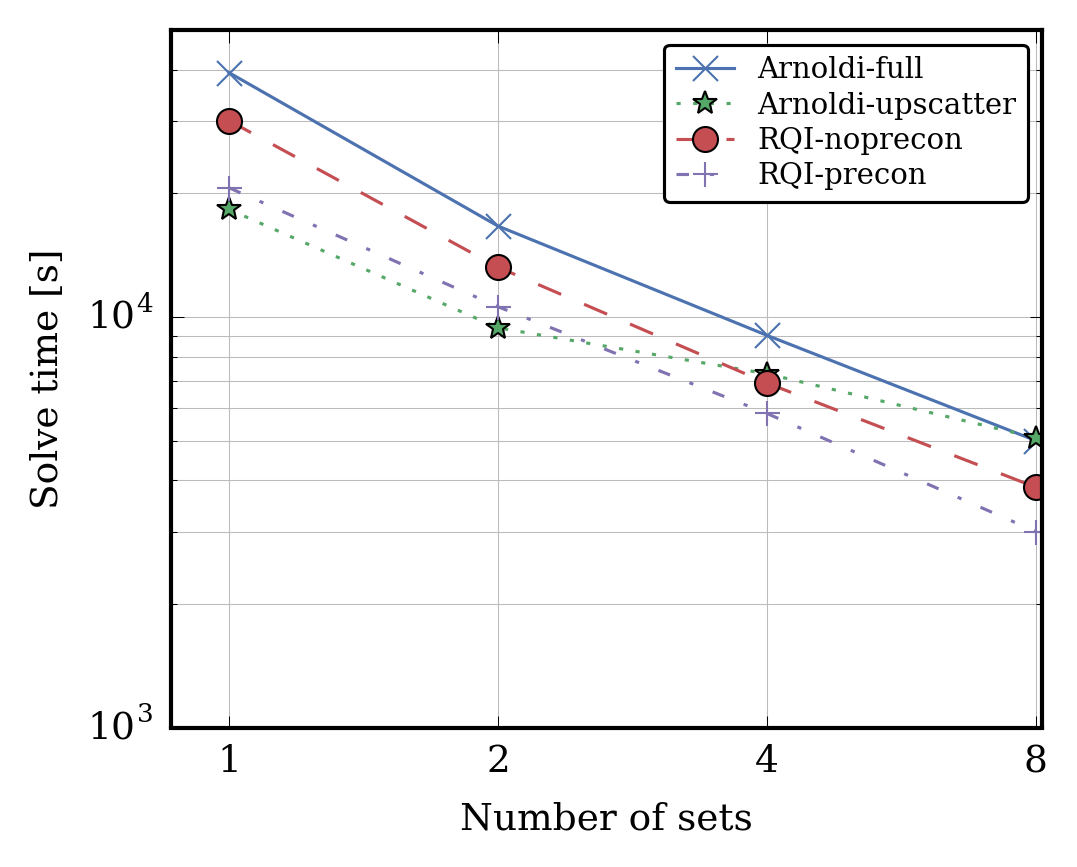

In [14]:
#ax = df.plot(logy=True, logx=True, marker='o')
marker = itertools.cycle(('x', '*', 'o', '+'))
lines = itertools.cycle(('-', ':', '--', '-.'))
fig = plt.figure()
ax = fig.add_subplot(111)
for c in df.columns:
    ax.loglog(df.index, df[c], marker=marker.next(), linestyle=lines.next())

#(fig, ax) = plt.subplots()
#ax.loglog(df.index, df.values)
ax.set_xlabel('Number of sets')
ax.set_ylabel('Solve time [s]')
ax.set_ylim(1e3, 5*1e4)
ax.set_xticks(df.index)
ax.set_xticklabels([1,2,4,8])
ax.set_xticks([], minor=True)
ax.margins(0.02)
ax.grid(b=True, which='major')
ax.grid(b=True, which='minor')
ax.legend()

In [10]:
fig.savefig("bw1484-large-titan-timing.pdf")